In [ ]:
import numpy as np

from wandas.core import ChannelFrame
from wandas.utils import generate_sample

In [3]:
signal = ChannelFrame.read_wav("./data/summer_streets1.wav")
signal.describe()

/workspaces/wandas/wandas/io/wav_io.py:26: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(filename)


# Make ChannelFrame from numpy array

In [ ]:
fs = 44100
rand_signal = np.random.rand(2, fs) - 0.5
signal = ChannelFrame.from_ndarray(rand_signal, sampling_rate=fs)
signal.describe()

# Make ChannelFrame using generate_sample 

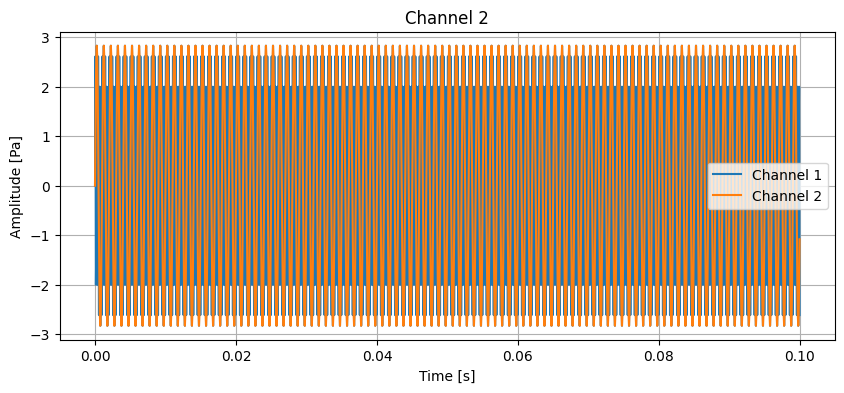

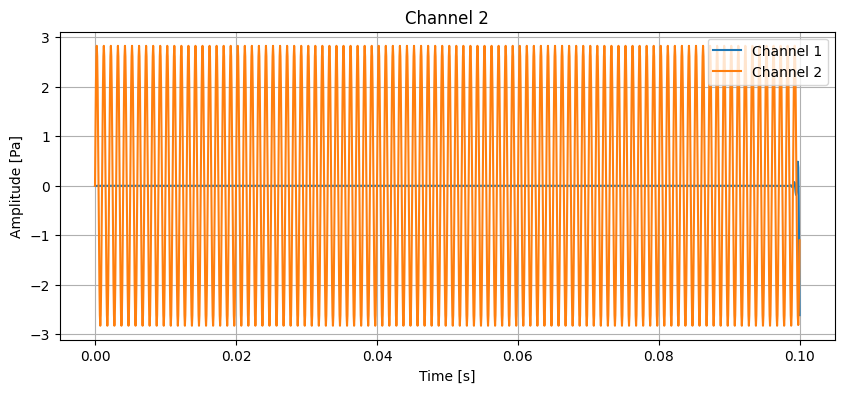

In [5]:
# Generate a sample
signal = generate_sample.generate_sample(freqs=[5000, 1000], duration=0.1)

# Apply a low-pass filteXr
filtered_signal = signal.low_pass_filter(cutoff=2000)

# Plot the signals
signal.plot(title="Original Signal")
filtered_signal.plot(title="Filtered Signal")

(<Axes: title={'center': 'Channel 1'}, xlabel='Time [s]', ylabel='Amplitude [Pa]'>,
 array([ 0.        ,  2.61312593, -2.        , ...,  1.0823922 ,
         2.        , -2.61312593]))

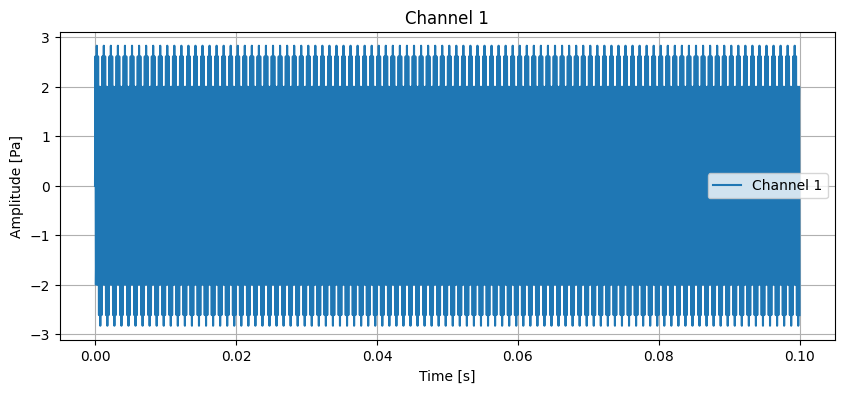

In [6]:
signal[0].plot()

(<Axes: title={'center': 'Channel 1'}, xlabel='Time [s]', ylabel='Amplitude [Pa]'>,
 array([ 0.        ,  2.61312593, -2.        , ...,  1.0823922 ,
         2.        , -2.61312593]))

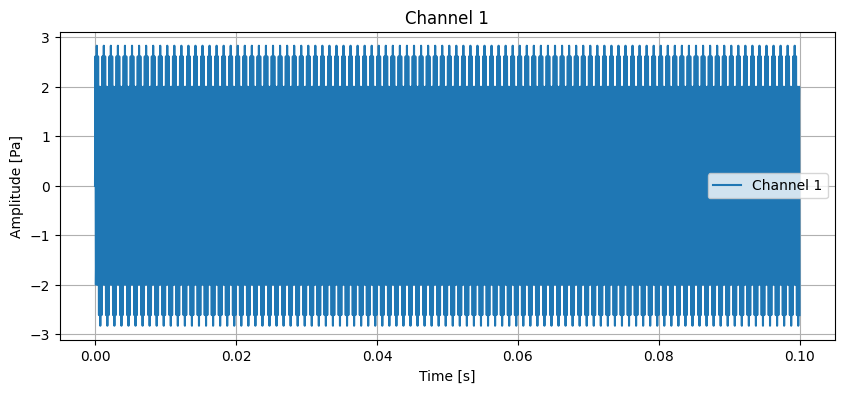

In [7]:
signal["Channel 1"].plot()

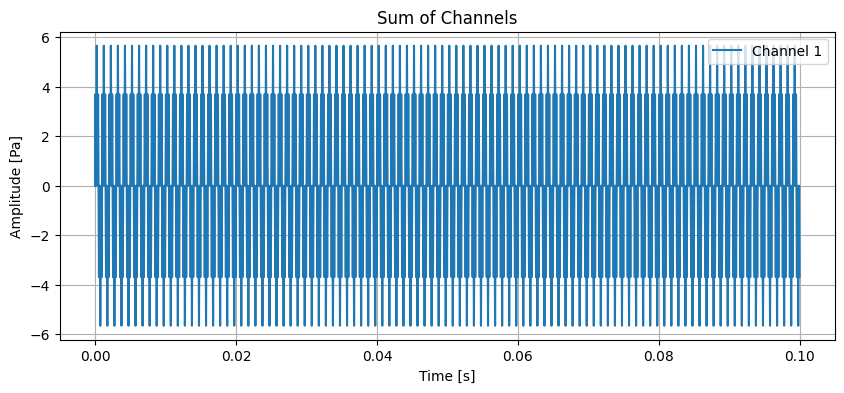

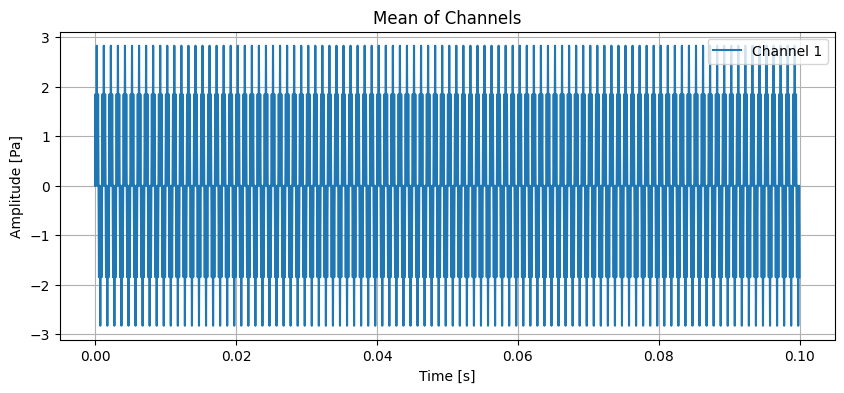

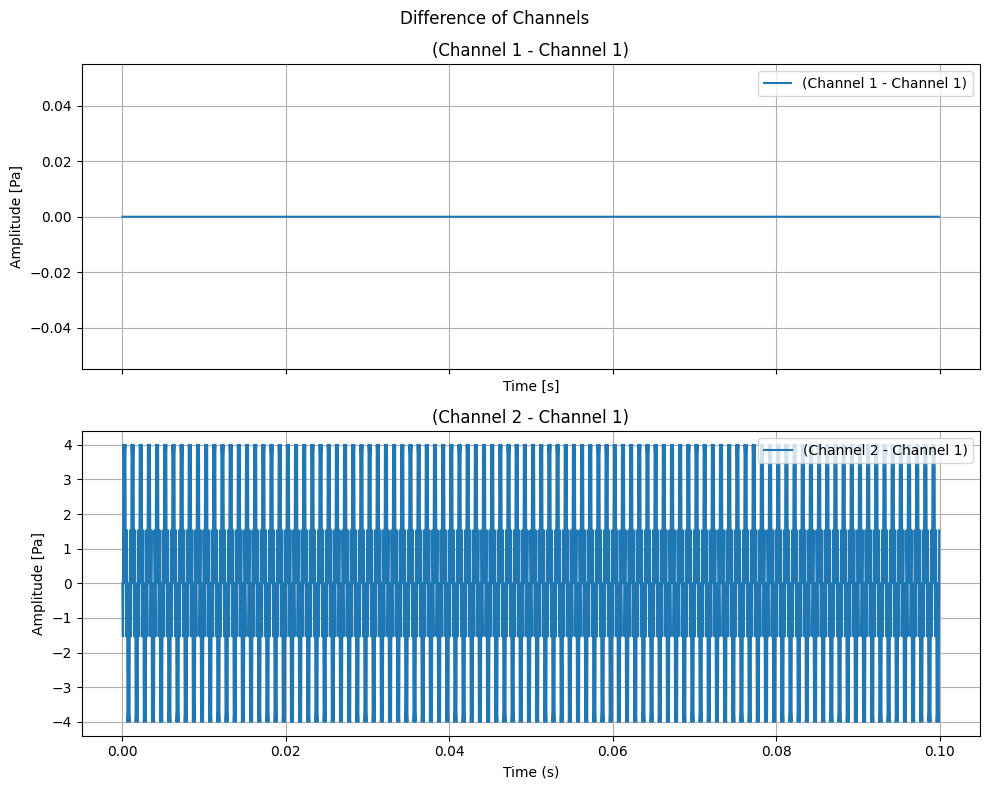

In [ ]:
signal.sum().plot(title="Sum of Channels")
signal.mean().plot(title="Mean of Channels")
signal.channel_difference(other_channel=0).plot(
    title="Difference of Channels", overlay=False
)

<Figure size 640x480 with 0 Axes>

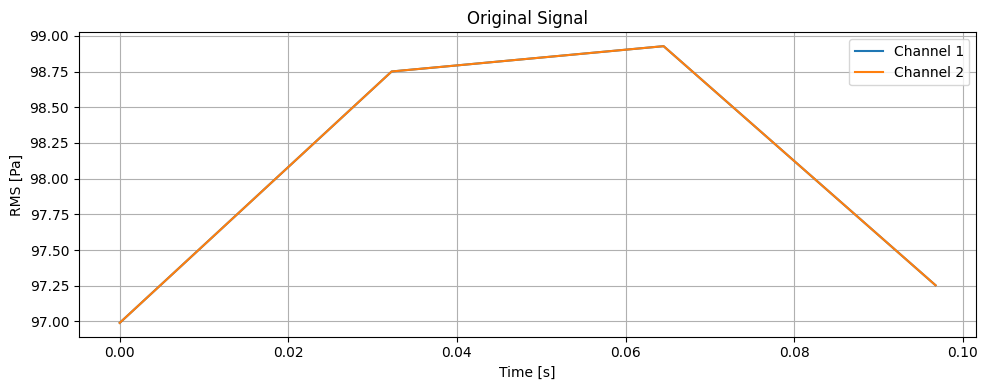

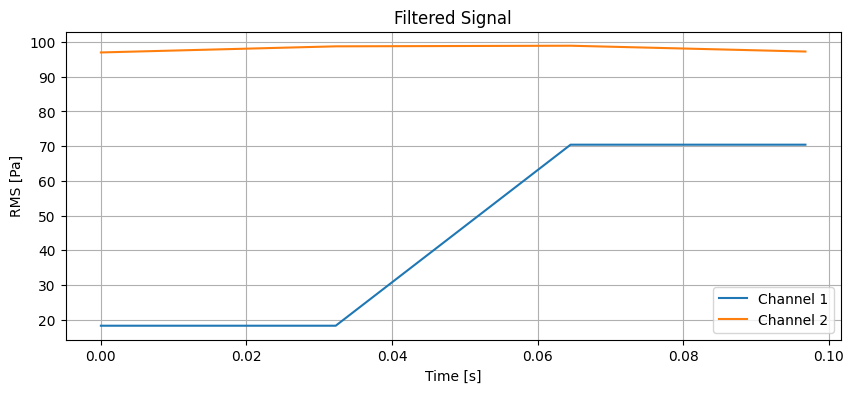

In [9]:
# Plot the signals
signal.rms_plot(title="Original Signal")
filtered_signal.rms_plot(title="Filtered Signal")

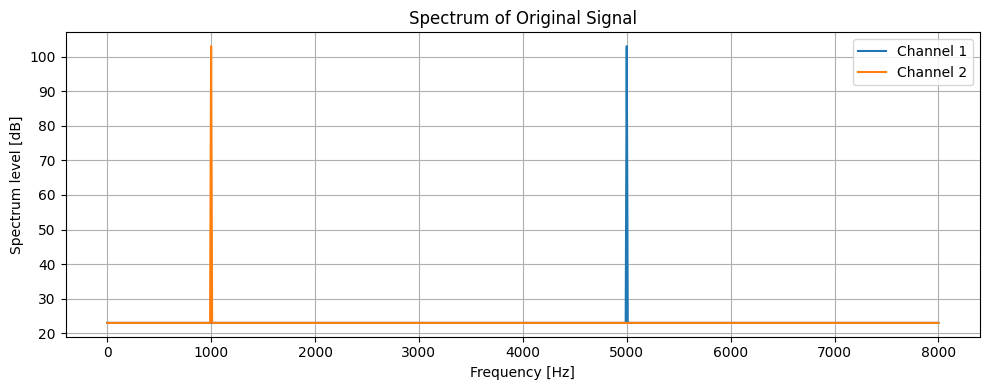

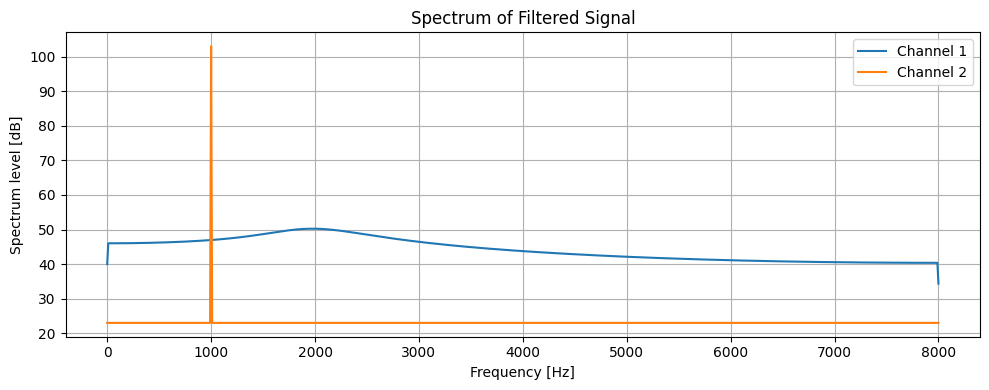

In [10]:
# Perform Fourier transform for spectral analysis
signal.fft().plot(title="Spectrum of Original Signal")
filtered_signal.fft().plot(title="Spectrum of Filtered Signal")

/home/vscode/.venv/lib/python3.10/site-packages/librosa/core/convert.py:1870: RuntimeWarning: divide by zero encountered in log10
  + 2 * np.log10(f_sq)


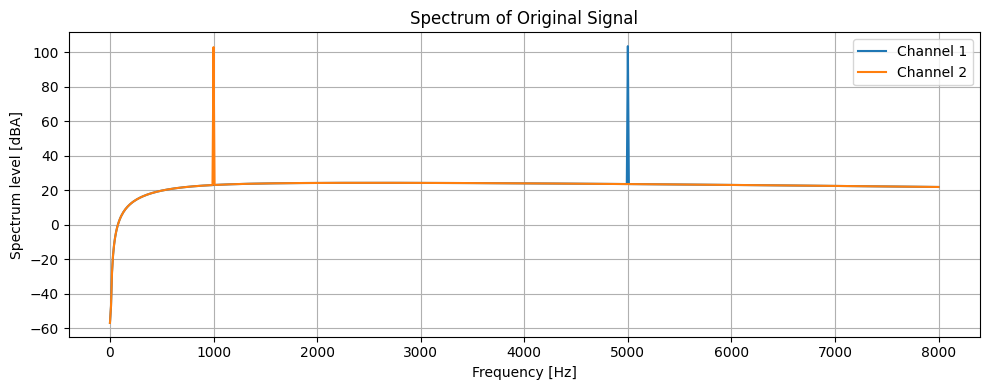

In [11]:
signal.fft().plot(title="Spectrum of Original Signal", Aw=True)

(<Axes: title={'center': 'Welch Spectrum of Original Signal'}, xlabel='Frequency [Hz]', ylabel='Spectrum level [dB]'>,
 array([ 26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  93.97940009,
        106.02059991,  93.97940009,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,  26.02059991,
         26.02059991,  26.02059991,  26.02059991,

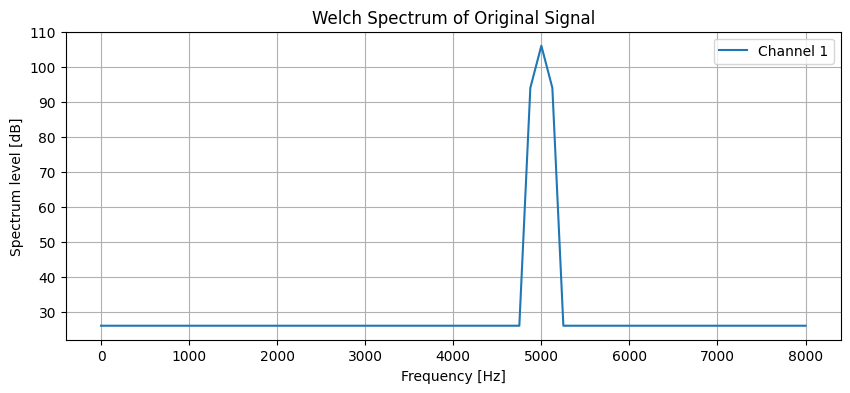

In [12]:
signal[0].welch(win_length=128).plot(title="Welch Spectrum of Original Signal")

(<Axes: title={'center': 'Channel 1'}, xlabel='Center frequency [Hz]', ylabel='Spectrum level [dBr]'>,
 array([19.97143778, 19.97143778, 19.97143778, 19.97143778, 19.97143778,
        19.97143778, 36.05788349, 37.06822694, 38.07440444, 39.08184634,
        40.09340635, 41.111721  , 42.14079616, 43.18700358, 44.26056392,
        45.37800375, 46.56641982, 47.87139891, 49.37377121, 51.23547152,
        53.89866383, 59.51740693, 77.8245881 , 99.97143778, 85.82971179]))

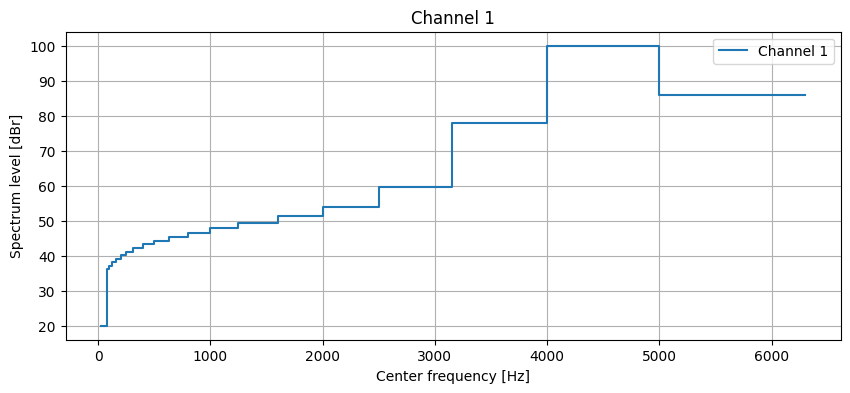

In [13]:
signal[0].noct_spectrum(fmin=25, fmax=6000).plot()

(<Axes: title={'center': 'Channel 1'}, xlabel='Center frequency [Hz]', ylabel='Spectrum level [dBrA]'>,
 array([-24.84464665, -19.55321209, -14.56383326, -10.29983443,
         -6.24801893,  -2.42327574,  16.91545101,  20.88065514,
         24.83170616,  28.23607239,  31.4195814 ,  34.46873114,
         37.3675094 ,  39.93967201,  42.35247898,  44.5836714 ,
         46.56676428,  48.44783133,  50.36701795,  52.43721819,
         55.16967699,  60.71889916,  78.78823346, 100.52592769,
         85.71423158]))

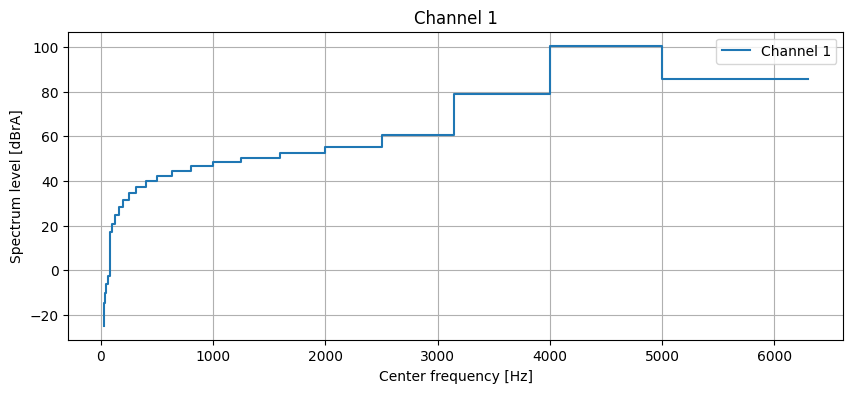

In [14]:
signal[0].noct_spectrum(fmin=25, fmax=6000).plot(Aw=True)

/home/vscode/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:1430: UserWarning: nperseg = 2048 is greater than input length  = 1600, using nperseg = 1600
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


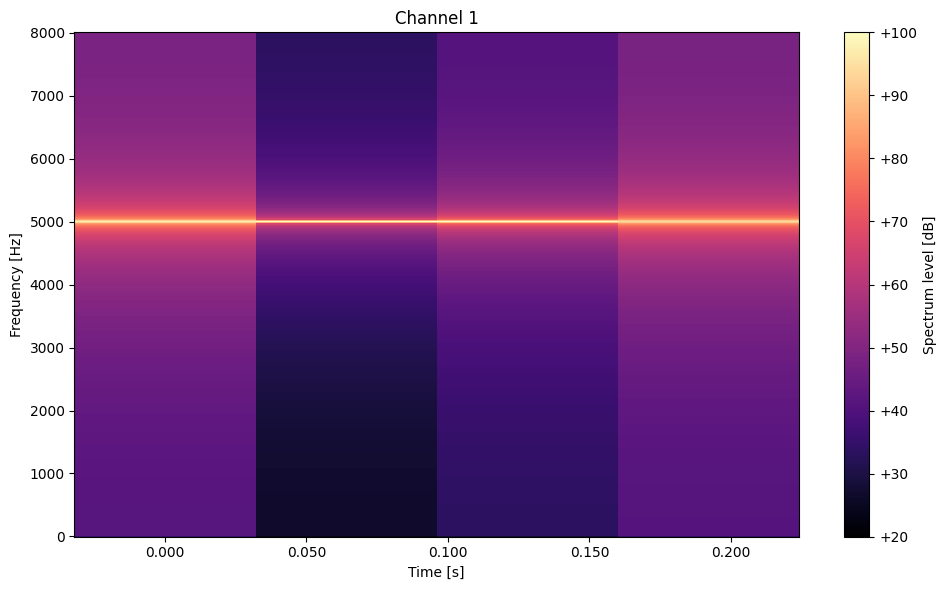

np.float64(102.85811261516392)

In [15]:
ax, spec = signal[0].stft().plot(vmin=20, vmax=100)
spec.max()

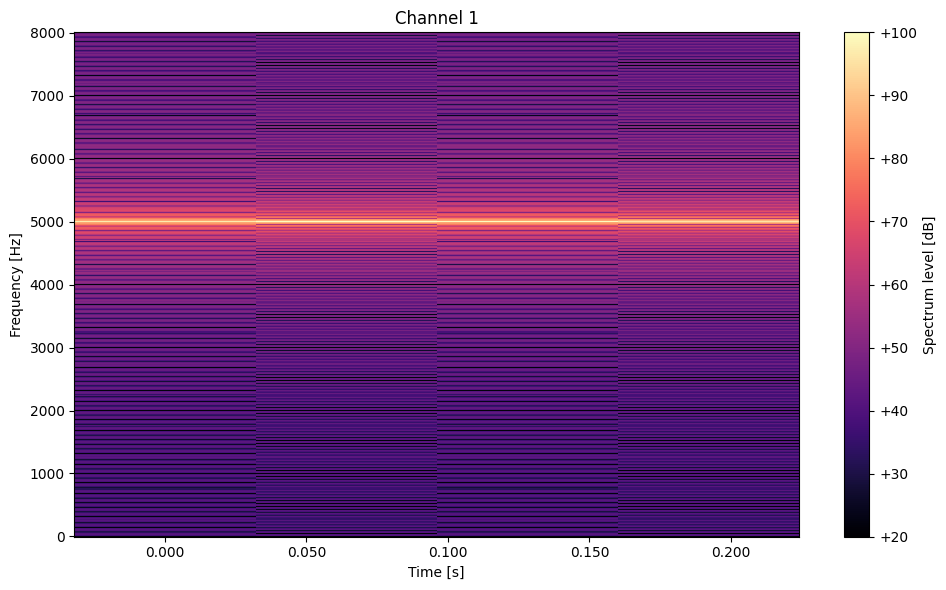

np.float64(101.70026898151117)

In [16]:
ax, spec = signal[0].stft(window="boxcar").plot(vmin=20, vmax=100)
spec.max()